In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [3]:
data=load_diabetes()

In [5]:
X=data.data
y=data.target
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]
152.13623331746496


In [6]:
y_pred = lr.predict(X_test)

In [7]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5188113124539249
RMSE 48.72713760953252


In [8]:
from sklearn.linear_model import Ridge 
r=Ridge(alpha=10)

In [9]:
r.fit(X_train, y_train)

Ridge(alpha=10)

In [10]:
print(r.coef_, r.intercept_)

[ 18.77788374   0.36423186  64.21521328  49.17553459  14.4397287
   9.62339853 -40.53928043  39.32153888  59.20162298  40.36525253] 151.96368446414732


In [11]:
r_y_pred = r.predict(X_test)

In [12]:
print("R2 score",r2_score(y_test,r_y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,r_y_pred)))

R2 score 0.18324524136176956
RMSE 63.48323251986342


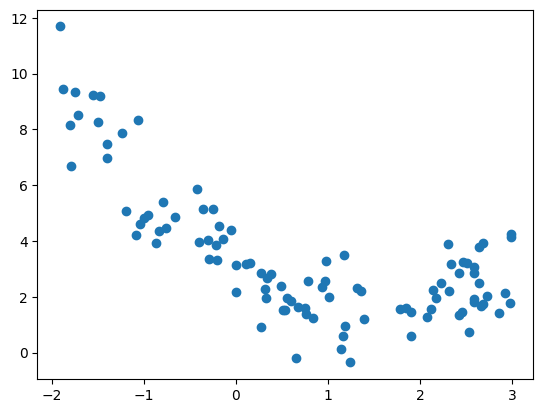

In [13]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [17]:
def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

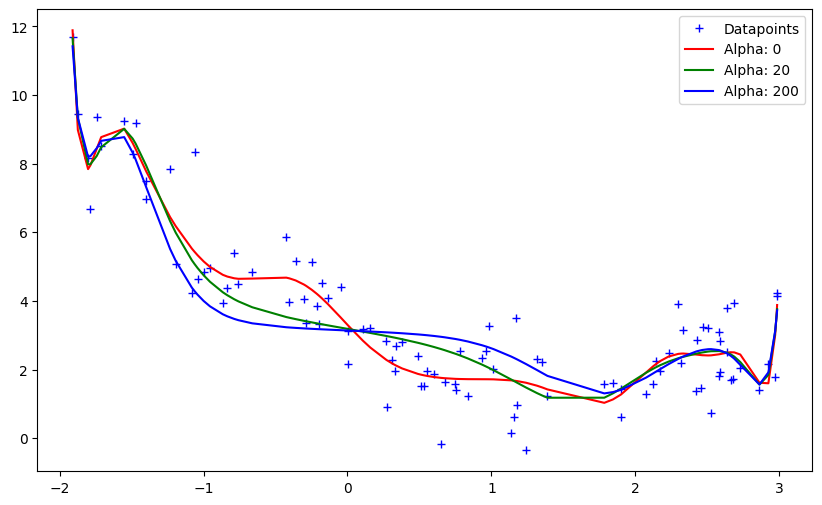

In [19]:
alphas = [0, 20, 200]
cs = ['r', 'g', 'b']
plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()